# 回忆之前的例子

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5., size=100)

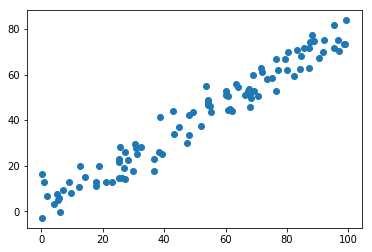

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

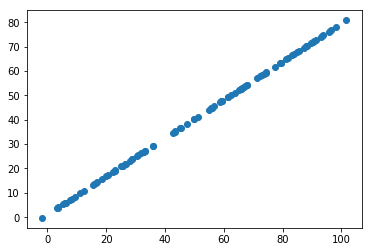

In [5]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

## 手写识别例子

In [6]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [7]:
X.shape

(1797, 64)

In [8]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [9]:
noisy_digits.shape

(1797, 64)

In [20]:
example_digits = noisy_digits[y==0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [22]:
example_digits.shape

(100, 64)

In [31]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
    plt.show()

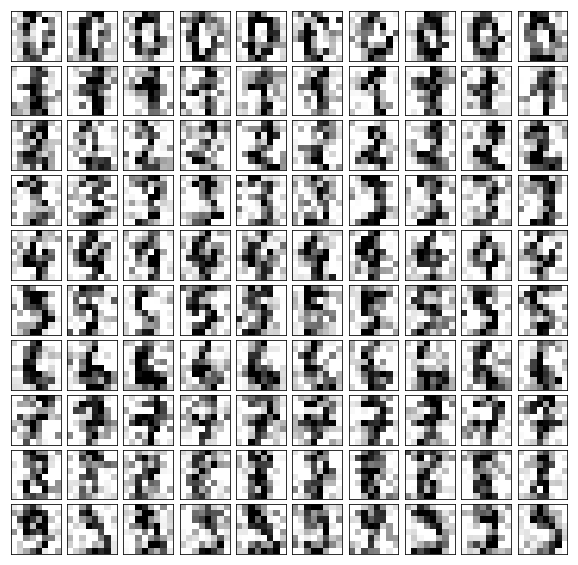

In [32]:
plot_digits(example_digits)

In [33]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.n_components_

12

In [35]:
components = pca.transform(example_digits)
fitered_digits = pca.inverse_transform(components)

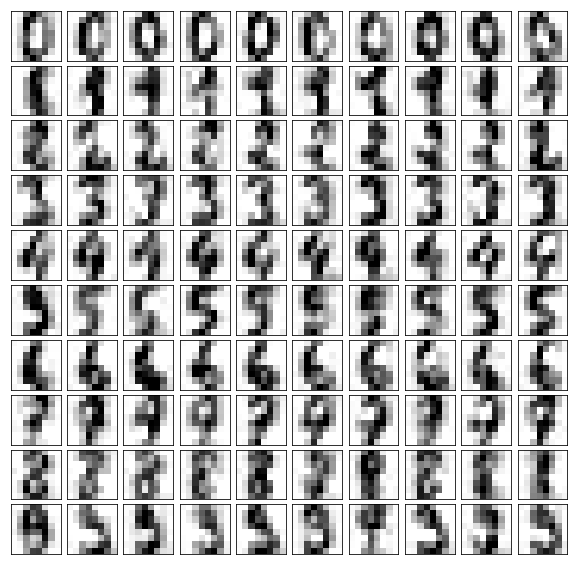

In [36]:
plot_digits(fitered_digits)